Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f7304c9f21ef547892a280cc3f36330d4e1ae92fdf23d678546b49b1ba3ba441
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
85.00000000000003


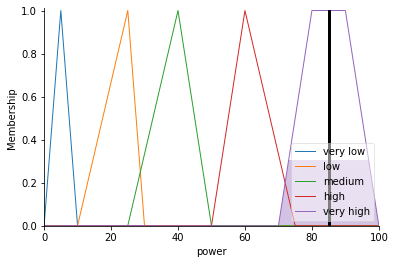

In [3]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10, 181, 1), 'time') 
rice = ctrl.Antecedent(np.arange(100, 1501, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very fast'] = fuzz.trimf(time.universe, [10, 15, 20])
time['fast'] = fuzz.trimf(time.universe, [20, 25, 30])
time['medium'] = fuzz.trimf(time.universe, [25, 40, 50])
time['slow'] = fuzz.trimf(time.universe, [50, 70, 90])
time['very slow'] = fuzz.trapmf(time.universe, [90, 180, 180, 180])

rice['very little'] = fuzz.trimf(rice.universe, [100, 150, 200])
rice['little'] = fuzz.trimf(rice.universe, [170, 350, 400])
rice['medium'] = fuzz.trimf(rice.universe, [400, 500, 600])
rice['much'] = fuzz.trimf(rice.universe, [550, 700, 800])
rice['very much'] = fuzz.trapmf(rice.universe, [780, 1500, 1500, 1500])

power['very low'] = fuzz.trimf(power.universe, [0, 5, 10])
power['low'] = fuzz.trimf(power.universe, [10, 25, 30])
power['medium'] = fuzz.trimf(power.universe, [25, 40, 50])
power['high'] = fuzz.trimf(power.universe, [50, 60, 75])
power['very high'] = fuzz.trapmf(power.universe, [70, 80, 90, 100])


rule1 = ctrl.Rule(time['very slow'] & rice['very little'], power['very low'])
rule2 = ctrl.Rule(time['very slow'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['very slow'] & rice['medium'], power['medium'])
rule4 = ctrl.Rule(time['very slow'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very slow'] & rice['very much'], power['very high'])

rule6 = ctrl.Rule(time['slow'] & rice['very little'], power['very low'])
rule7 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['slow'] & rice['medium'], power['medium'])
rule9 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['slow'] & rice['very much'], power['very high'])

rule11 = ctrl.Rule(time['medium'] & rice['very little'], power['low'])
rule12 = ctrl.Rule(time['medium'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['medium'] & rice['medium'], power['medium'])
rule14 = ctrl.Rule(time['medium'] & rice['much'], power['very high'])
rule15 = ctrl.Rule(time['medium'] & rice['very much'], power['very high'])

rule16 = ctrl.Rule(time['fast'] & rice['very little'], power['low'])
rule17 = ctrl.Rule(time['fast'] & rice['little'], power['medium'])
rule18 = ctrl.Rule(time['fast'] & rice['medium'], power['medium'])
rule19 = ctrl.Rule(time['fast'] & rice['much'], power['very high'])
rule20 = ctrl.Rule(time['fast'] & rice['very much'], power['very high'])

rule21 = ctrl.Rule(time['very fast'] & rice['very little'], power['low'])
rule22 = ctrl.Rule(time['very fast'] & rice['little'], power['medium'])
rule23 = ctrl.Rule(time['very fast'] & rice['medium'], power['high'])
rule24 = ctrl.Rule(time['very fast'] & rice['much'], power['very high'])
rule25 = ctrl.Rule(time['very fast'] & rice['very much'], power['very high'])

power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                 rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 1000

powering.compute()

print(powering.output['power'])
power.view(sim = powering)